# Predicting Hospital Readmission for Diabetic Patients

## Problem Statement
A hospital readmission occurs when a discharged patient returns within a specific period (typically 30 days). High readmission rates signal poor hospital quality and significantly increase healthcare costs. The Hospital Readmissions Reduction Program (HRRP) penalizes hospitals with excessive readmissions for certain conditions, costing approximately **$41 billion for diabetic patients in 2011**. Though diabetes isn't yet directly penalized under HRRP, it's a growing concern in healthcare quality management.

## Objective
Using a medical claims dataset from 130 US hospitals (1999-2008), this project aims to answer:

What are the strongest predictors of hospital readmission in diabetic patients?
How accurately can we predict readmissions with limited features using machine learning?

## Step-by-Step Approach
- **Analyze Dataset**: Review patient and encounter data to identify relevant features.
- **Identify Predictors**: Determine which factors (e.g., diagnoses, medications) strongly correlate with readmissions.
- **Exploratory Data Analysis (EDA)**: summarize main characteristics, primarily using data visualization and descriptive statistics.
- **Build Model**: Use limited features to predict readmissions accurately.
- **Evaluate Results**: Assess model performance and predictor importance.

## Dataset Description
The dataset contains patient and encounter details for diabetic patients, with features listed below.

### Key Variables
| **Variable** | **Description** | **Values/Format** |
|--------------|------------------|-------------------|
| Encounter ID | Unique encounter identifier | Numeric |
| Patient Number | Unique patient identifier | Numeric |
| Race | Patient’s race | Caucasian, Asian, African American, Hispanic, Other |
| Gender | Patient’s gender | Male, Female, Unknown/Invalid |
| Age | Patient’s age group | 10-year intervals (e.g., [0-10), [10-20), …, [90-100)) |
| Weight | Patient’s weight | Pounds (Numeric) |
| Admission Type | Type of admission | 9 values (e.g., Emergency, Urgent, Elective) |
| Discharge Disposition | Discharge status | 29 values (e.g., Home, Expired) |
| Admission Source | Source of admission | 21 values (e.g., Physician Referral, Emergency Room) |
| Time in Hospital | Days from admission to discharge | Integer |
| Payer Code | Insurance provider | 23 values (e.g., Medicare, Self-Pay) |
| Medical Specialty | Admitting physician’s specialty | 84 values (e.g., Cardiology, Internal Medicine) |
| Number of Lab Procedures | Lab tests performed | Numeric |
| Number of Procedures | Non-lab procedures | Numeric |
| Number of Medications | Distinct medications given | Numeric |
| Number of Outpatient Visits | Outpatient visits in prior year | Numeric |
| Number of Emergency Visits | Emergency visits in prior year | Numeric |
| Number of Inpatient Visits | Inpatient visits in prior year | Numeric |
| Diagnosis 1 | Primary diagnosis | ICD9 first 3 digits (848 values) |
| Diagnosis 2 | Secondary diagnosis | ICD9 first 3 digits (923 values) |
| Diagnosis 3 | Additional diagnosis | ICD9 first 3 digits (954 values) |
| Number of Diagnoses | Total diagnoses recorded | Numeric |
| Glucose Serum Test Result | Blood glucose level | >200, >300, Normal, None |
| A1c Test Result | A1c test outcome | >8%, >7%, Normal, None |
| Change of Medications | Change in diabetic medication | Change, No Change |
| Diabetes Medications | Diabetic medication prescribed | Yes, No |
| Medication Features (24) | Status of 24 diabetic drugs (e.g., metformin, insulin) | Up, Down, Steady, No |
| Readmitted | Time to readmission | <30 days, >30 days, No |



In [1]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, precision_recall_curve, auc
from imblearn.over_sampling import ADASYN
from sklearn.feature_selection import VarianceThreshold, RFE
import warnings
warnings.filterwarnings('ignore')

# Data Preparation & Exploration 

In [2]:
# Load dataset
df = pd.read_csv("C:/Users/satya/Downloads/AIT-582-ResearchProject/diabetic_data.csv")

In [3]:
#displaying first 10 rows of data
df.head(10).T

0          1  \
encounter_id                               2278392     149190   
patient_nbr                                8222157   55629189   
race                                     Caucasian  Caucasian   
gender                                      Female     Female   
age                                         [0-10)    [10-20)   
weight                                           ?          ?   
admission_type_id                                6          1   
discharge_disposition_id                        25          1   
admission_source_id                              1          7   
time_in_hospital                                 1          3   
payer_code                                       ?          ?   
medical_specialty         Pediatrics-Endocrinology          ?   
num_lab_procedures                              41         59   
num_procedures                                   0          0   
num_medications                                  1         18   
number_outpatient                                0          0   
number_emergency                                 0          0   
number_inpatient                                 0          0   
diag_1                                      250.83        276   
diag_2                                           ?     250.01   
diag_3                                           ?        255   
number_diagnoses                                 1          9   
max_glu_serum                                  NaN        NaN   
A1Cresult                                      NaN        NaN   
metformin                                       No         No   
repaglinide                                     No         No   
nateglinide                                     No         No   
chlorpropamide                                  No         No   
glimepiride                                     No         No   
acetohexamide                                   No         No   
glipizide                                       No         No   
glyburide                                       No         No   
tolbutamide                                     No         No   
pioglitazone                                    No         No   
rosiglitazone                                   No         No   
acarbose                                        No         No   
miglitol                                        No         No   
troglitazone                                    No         No   
tolazamide                                      No         No   
examide                                         No         No   
citoglipton                                     No         No   
insulin                                         No         Up   
glyburide-metformin                             No         No   
glipizide-metformin                             No         No   
glimepiride-pioglitazone                        No         No   
metformin-rosiglitazone                         No         No   
metformin-pioglitazone                          No         No   
change                                          No         Ch   
diabetesMed                                     No        Yes   
readmitted                                      NO        >30   

                                        2          3          4          5  \
encounter_id                        64410     500364      16680      35754   
patient_nbr                      86047875   82442376   42519267   82637451   
race                      AfricanAmerican  Caucasian  Caucasian  Caucasian   
gender                             Female       Male       Male       Male   
age                               [20-30)    [30-40)    [40-50)    [50-60)   
weight                                  ?          ?          ?          ?   
admission_type_id                       1          1          1          2   
discharge_disposition_id                1          1          1          1   
admission_source_id            

In [4]:
#checking shape of the dataset
df.shape

(101766, 50)

In [5]:
#Checking data types of each variable
df.dtypes

encounter_id                 int64
patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride         

In [6]:
df.isnull().sum()

encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride                     0
acetohexamide 

In [7]:
df.max_glu_serum.unique()

array([nan, '>300', 'Norm', '>200'], dtype=object)

In [8]:
df.A1Cresult.unique()

array([nan, '>7', '>8', 'Norm'], dtype=object)

In [9]:
df.gender.unique()

array(['Female', 'Male', 'Unknown/Invalid'], dtype=object)

In [10]:
df.race.unique()

array(['Caucasian', 'AfricanAmerican', '?', 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [11]:
#Checking for missing values in dataset
#In the dataset missing values are represented as '?' sign
for col in df.columns:
    if df[col].dtype == object:
         print(col,df[col][df[col] == '?'].count())

race 2273
gender 0
age 0
weight 98569
payer_code 40256
medical_specialty 49949
diag_1 21
diag_2 358
diag_3 1423
max_glu_serum 0
A1Cresult 0
metformin 0
repaglinide 0
nateglinide 0
chlorpropamide 0
glimepiride 0
acetohexamide 0
glipizide 0
glyburide 0
tolbutamide 0
pioglitazone 0
rosiglitazone 0
acarbose 0
miglitol 0
troglitazone 0
tolazamide 0
examide 0
citoglipton 0
insulin 0
glyburide-metformin 0
glipizide-metformin 0
glimepiride-pioglitazone 0
metformin-rosiglitazone 0
metformin-pioglitazone 0
change 0
diabetesMed 0
readmitted 0


In [12]:
# gender was coded differently so we use a custom count for this one            
print('gender', df['gender'][df['gender'] == 'Unknown/Invalid'].count())            

gender 3


In [13]:
# Encode age as numeric (1–10)
for i in range(10):
    df['age'] = df['age'].replace(f'[{10*i}-{10*(i+1)})', i+1)

In [14]:
# Encode medication columns as numeric (0 for "No", 1 for "Steady"/"Up"/"Down")
medication_cols = [
    'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 
    'glipizide', 'glyburide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
    'miglitol', 'insulin', 'glyburide-metformin', 'tolazamide', 
    'metformin-pioglitazone', 'metformin-rosiglitazone', 'glimepiride-pioglitazone', 
    'glipizide-metformin', 'troglitazone', 'tolbutamide', 'acetohexamide'
]
for col in medication_cols:
    df[col] = df[col].map({'No': 0, 'Steady': 1, 'Up': 1, 'Down': 1})

In [15]:
# Handle missing values
df['race'] = df['race'].replace('?', 'Unknown')
df['medical_specialty'] = df['medical_specialty'].replace('?', 'Unknown')
for col in ['diag_1', 'diag_2', 'diag_3']:
    df[col] = df[col].replace('?', 'Missing')
df = df[df['gender'] != 'Unknown/Invalid']
df = df.drop(['weight', 'payer_code', 'citoglipton', 'examide'], axis=1)
df['max_glu_serum'] = df['max_glu_serum'].replace(np.nan, 'Not Tested')
df['A1Cresult'] = df['A1Cresult'].replace(np.nan, 'Not Tested')

In [16]:
# Drop deceased patients
df = df[df['discharge_disposition_id'] != 11]

In [17]:
# Encode change and readmitted as numeric
df['change'] = df['change'].replace({'No': 0, 'Ch': 1})
df['readmitted'] = df['readmitted'].replace({'<30': 1, '>30': 0, 'NO': 0})

In [18]:
# Drop low-variance medication columns
selector = VarianceThreshold(threshold=0.01)
selector.fit(df[medication_cols])
medication_cols = [medication_cols[i] for i in range(len(medication_cols)) if selector.get_support()[i]]

In [19]:
df_agg = df.groupby('patient_nbr').agg({
    'time_in_hospital': 'mean',
    'num_lab_procedures': 'mean',
    'num_procedures': 'mean',
    'num_medications': 'mean',
    'number_outpatient': 'sum',
    'number_emergency': 'sum',
    'number_inpatient': 'sum',
    'number_diagnoses': 'mean',
    'readmitted': 'max',  # 1 if any encounter has readmitted <30 days
    'gender': 'first',
    'age': 'first',
    'max_glu_serum': lambda x: x.mode()[0] if not x.mode().empty else 'Not Tested',
    'A1Cresult': lambda x: x.mode()[0] if not x.mode().empty else 'Not Tested',
    'change': 'sum',  # Sum of changes (numeric 0/1)
    'diabetesMed': 'max',
    **{col: 'max' for col in medication_cols}  # Max usage per medication
}).reset_index()

In [20]:
# Count encounters per patient
encounter_counts = df.groupby('patient_nbr').size().reset_index(name='encounter_count')
df_agg = df_agg.merge(encounter_counts, on='patient_nbr')

In [21]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'medical_specialty', 'num_lab_procedures',
       'num_procedures', 'num_medications', 'number_outpatient',
       'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3',
       'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin',
       'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride',
       'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [22]:
df.isnull().sum()

encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamide                 0
pioglitazone                0
rosiglitazone               0
acarbose  

In [23]:
# Compute numchange
df_agg['numchange'] = df_agg[medication_cols].gt(0).sum(axis=1)
df_agg['service_utilization'] = df_agg['number_outpatient'] + df_agg['number_emergency'] + df_agg['number_inpatient']

In [24]:
# Group diagnoses
def group_icd9(code):
    if code.startswith('250'): return 'Diabetes'
    elif code.startswith('390') or code.startswith('410') or code.startswith('428'): return 'Circulatory'
    elif code.startswith('460') or code.startswith('786'): return 'Respiratory'
    elif code == 'Missing': return 'Missing'
    else: return 'Other'
for col in ['diag_1', 'diag_2', 'diag_3']:
    df_agg[col + '_group'] = df.groupby('patient_nbr')[col].apply(lambda x: group_icd9(x.iloc[0])).reset_index(drop=True)


# Feature Engineering

In [25]:
# Log-transform skewed features
for col in ['time_in_hospital', 'num_lab_procedures', 'num_medications', 'service_utilization', 'number_inpatient']:
    df_agg[col + '_log'] = np.log1p(df_agg[col])

In [26]:
# Create ratio features
df_agg['meds_per_diag'] = df_agg['num_medications'] / df_agg['number_diagnoses'].replace(0, 1)
df_agg['hospital_per_age'] = df_agg['time_in_hospital'] / df_agg['age'].replace(0, 1)

In [27]:
# Bin medical_specialty
def bin_specialty(spec):
    if spec in ['InternalMedicine', 'Cardiology', 'Family/GeneralPractice']: return spec
    else: return 'Other'
df_agg['medical_specialty_group'] = df.groupby('patient_nbr')['medical_specialty'].apply(lambda x: bin_specialty(x.iloc[0])).reset_index(drop=True)

In [28]:
# Encode categorical variables
df_agg['gender'] = df_agg['gender'].replace({'Male': 1, 'Female': 0})
df_agg['diabetesMed'] = df_agg['diabetesMed'].replace({'Yes': 1, 'No': 0})
df_agg['max_glu_serum'] = df_agg['max_glu_serum'].replace({'>200': 1, '>300': 1, 'Norm': 0, 'Not Tested': -1})
df_agg['A1Cresult'] = df_agg['A1Cresult'].replace({'>7': 1, '>8': 1, 'Norm': 0, 'Not Tested': -1})

In [29]:
# One-hot encode categorical variables
categorical_cols = ['medical_specialty_group', 'max_glu_serum', 'A1Cresult', 'diag_1_group', 'diag_2_group', 'diag_3_group']
df_agg = pd.get_dummies(df_agg, columns=categorical_cols, drop_first=True)

In [30]:
# Interaction terms
interaction_terms = [('num_medications', 'time_in_hospital'), ('num_medications', 'number_diagnoses')]
for inter in interaction_terms:
    name = inter[0] + '|' + inter[1]
    df_agg[name] = df_agg[inter[0]] * df_agg[inter[1]]

In [31]:
# Define numeric columns
numeric_cols = [
    'age', 'time_in_hospital_log', 'num_lab_procedures_log', 'num_procedures', 'num_medications_log',
    'number_outpatient', 'number_emergency', 'number_inpatient_log', 'number_diagnoses',
    'service_utilization_log', 'numchange', 'encounter_count', 'meds_per_diag', 'hospital_per_age',
    'num_medications|time_in_hospital', 'num_medications|number_diagnoses'
]

In [32]:
df_agg.sample(5).T

54344      61281     28876  \
patient_nbr                                     89699589  100615293  39889971   
time_in_hospital                                    11.0        7.0       5.0   
num_lab_procedures                                  66.0       58.0      73.0   
num_procedures                                       6.0        1.2       1.0   
num_medications                                     51.0       24.2      13.0   
number_outpatient                                      0          2         0   
number_emergency                                       0          1         0   
number_inpatient                                       1          6         1   
number_diagnoses                                     9.0        9.0       9.0   
readmitted                                             0          1         0   
gender                                                 1          0         0   
age                                                    9          8         9   
change                                                 1          1         1   
diabetesMed                                            1          1         1   
metformin                                              1          0         1   
repaglinide                                            0          0         0   
glimepiride                                            0          0         0   
glipizide                                              0          0         0   
glyburide                                              0          1         1   
pioglitazone                                           1          0         0   
rosiglitazone                                          0          0         1   
insulin                                                1          0         1   
encounter_count                                        1          5         1   
numchange                                              3          1         4   
service_utilization                                    1          9         1   
time_in_hospital_log                            2.484907   2.079442  1.791759   
num_lab_procedures_log                          4.204693   4.077537  4.304065   
num_medications_log                             3.951244   3.226844  2.639057   
service_utilization_log                         0.693147   2.302585  0.693147   
number_inpatient_log                            0.693147    1.94591  0.693147   
meds_per_diag                                   5.666667   2.688889  1.444444   
hospital_per_age                                1.222222      0.875  0.555556   
medical_specialty_group_Family/GeneralPractice     False      False     False   
medical_specialty_group_InternalMedicine           False      False     False   
medical_specialty_group_Other                       True       True      True   
max_glu_serum_0                                    False      False     False   
max_glu_serum_1                                    False      False     False   
A1Cresult_0                                        False      False      True   
A1Cresult_1                                        False      False     False   
diag_1_group_Diabetes                              False      False     False   
diag_1_group_Missing                               False      False     False   
diag_1_group_Other                                  True       True      True   
diag_1_group_Respiratory                           False      False     False   
diag_2_group_Diabetes                              False      False     False   
diag_2_group_Missing                               False      False     False   
diag_2_group_Other                                  True       True      True   
diag_2_group_Respiratory                           False      False     False   
diag_3_group_Diabetes                              False      False     False   
diag_3_group_Missing                               False      False     False   
d

In [33]:
df_agg['readmitted'].value_counts()

readmitted
0    61609
1     8834
Name: count, dtype: int64

In [34]:
df_agg['change'].unique()

array([ 2,  0,  1,  4,  3,  6,  5,  8, 11,  7, 10, 20, 19, 12, 14,  9, 15,
       17, 25, 13, 39, 16])

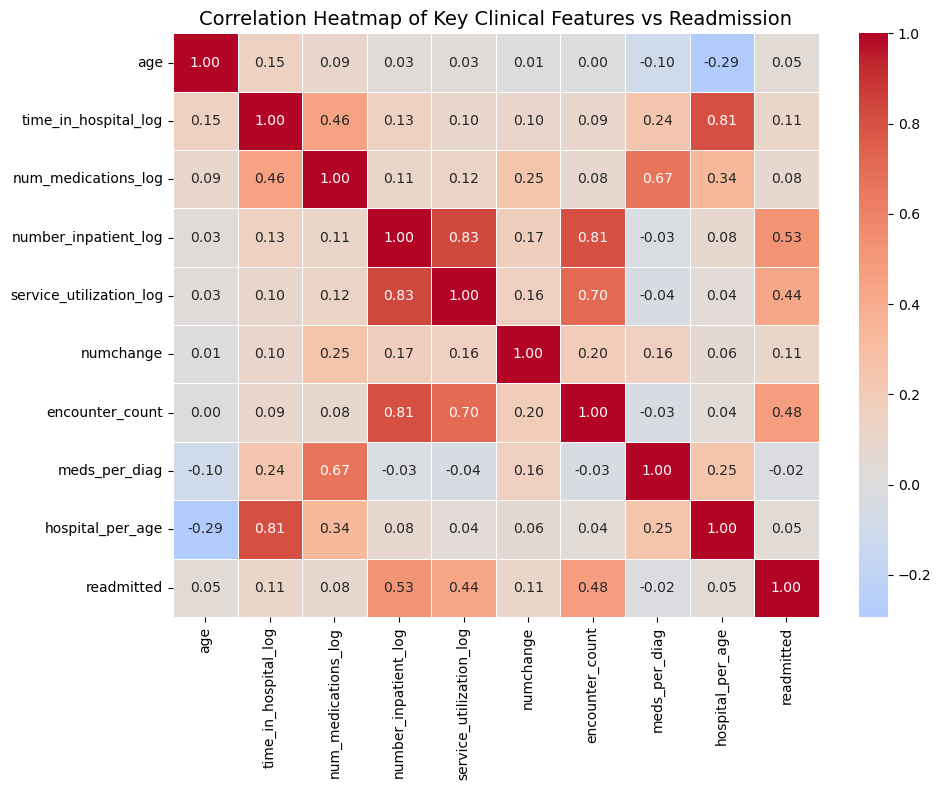

In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

key_features = [
    'age',
    'time_in_hospital_log',
    'num_medications_log',
    'number_inpatient_log',
    'service_utilization_log',
    'numchange',
    'encounter_count',
    'meds_per_diag',
    'hospital_per_age',
    'readmitted'
]

corr_key = df_agg[key_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_key,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    linewidths=0.5
)

plt.title("Correlation Heatmap of Key Clinical Features vs Readmission", fontsize=14)
plt.tight_layout()
plt.show()


# Modeling

In [36]:
# Feature set
feature_set = numeric_cols + [col for col in df_agg.columns if col.startswith((
    'medical_specialty_group_', 'max_glu_serum_', 'A1Cresult_', 'diag_1_group_', 'diag_2_group_', 'diag_3_group_'
))] + medication_cols + ['gender', 'change', 'diabetesMed']
X = df_agg[feature_set]
y = df_agg['readmitted']

In [37]:
# Feature selection with RFE
rf = RandomForestClassifier(random_state=0)
rfe = RFE(estimator=rf, n_features_to_select=30)
rfe.fit(X, y)
X = X[X.columns[rfe.support_]]

In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply ADASYN
adasyn = ADASYN(random_state=0)
X_train_resampled, y_train_resampled = adasyn.fit_resample(X_train_scaled, y_train)

In [39]:
# --- Model 1: Decision Tree ---
print("=== Decision Tree ===")
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=0)
dt_params = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [5, 10, 20],
    'min_samples_leaf': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}
dt_grid = GridSearchCV(dt_model, dt_params, cv=StratifiedKFold(5), scoring='recall')
dt_grid.fit(X_train_resampled, y_train_resampled)
print("Best Decision Tree Parameters:", dt_grid.best_params_)
dt_model = dt_grid.best_estimator_

y_pred_dt = dt_model.predict(X_test_scaled)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:")
print(cm_dt)
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_proba_dt)
pr_auc_dt = auc(recall_dt, precision_dt)
print(f"\nDecision Tree ROC-AUC: {roc_auc_dt:.2f}, PR-AUC: {pr_auc_dt:.2f}")

=== Decision Tree ===
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 5}

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92     12330
           1       0.47      0.61      0.53      1759

    accuracy                           0.86     14089
   macro avg       0.70      0.76      0.73     14089
weighted avg       0.88      0.86      0.87     14089


Decision Tree Confusion Matrix:
[[11097  1233]
 [  681  1078]]

Decision Tree ROC-AUC: 0.84, PR-AUC: 0.48


In [40]:
# --- Model 1: Decision Tree (CPU, streamlined) ---
print("=== Decision Tree ===")
dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=0)
dt_params = {
    'max_depth': [5, 7],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 5],
    'criterion': ['gini']
}
dt_grid = GridSearchCV(dt_model, dt_params, cv=StratifiedKFold(3), scoring='f1', n_jobs=-1)
dt_grid.fit(X_train_resampled, y_train_resampled)
print("Best Decision Tree Parameters:", dt_grid.best_params_)
dt_model = dt_grid.best_estimator_

y_pred_dt = dt_model.predict(X_test_scaled)
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:")
print(cm_dt)
y_pred_proba_dt = dt_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_proba_dt)
pr_auc_dt = auc(recall_dt, precision_dt)
print(f"\nDecision Tree ROC-AUC: {roc_auc_dt:.2f}, PR-AUC: {pr_auc_dt:.2f}")

=== Decision Tree ===
Best Decision Tree Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5}

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.87      0.91     12330
           1       0.44      0.70      0.54      1759

    accuracy                           0.85     14089
   macro avg       0.70      0.79      0.73     14089
weighted avg       0.89      0.85      0.87     14089


Decision Tree Confusion Matrix:
[[10772  1558]
 [  520  1239]]

Decision Tree ROC-AUC: 0.85, PR-AUC: 0.43


In [41]:
# --- Model 2: XGBoost ---
print("\n=== XGBoost ===")
xgb_model = XGBClassifier(random_state=0)
xgb_params = {
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 300],
    'subsample': [0.7, 0.9],
    'min_child_weight': [1, 3],
    'scale_pos_weight': [5, 10]
}
xgb_grid = GridSearchCV(xgb_model, xgb_params, cv=StratifiedKFold(5), scoring='recall')
xgb_grid.fit(X_train_resampled, y_train_resampled)
print("Best XGBoost Parameters:", xgb_grid.best_params_)
xgb_model = xgb_grid.best_estimator_

y_pred_xgb = xgb_model.predict(X_test_scaled)
print("\nXGBoost Classification Report:")
print(classification_report(y_test, y_pred_xgb))
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nXGBoost Confusion Matrix:")
print(cm_xgb)
y_pred_proba_xgb = xgb_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_xgb = roc_auc_score(y_test, y_pred_proba_xgb)
precision_xgb, recall_xgb, _ = precision_recall_curve(y_test, y_pred_proba_xgb)
pr_auc_xgb = auc(recall_xgb, precision_xgb)
print(f"\nXGBoost ROC-AUC: {roc_auc_xgb:.2f}, PR-AUC: {pr_auc_xgb:.2f}")


=== XGBoost ===
Best XGBoost Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 10, 'subsample': 0.9}

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.00      0.01     12330
           1       0.13      1.00      0.22      1759

    accuracy                           0.13     14089
   macro avg       0.56      0.50      0.12     14089
weighted avg       0.89      0.13      0.04     14089


XGBoost Confusion Matrix:
[[   58 12272]
 [    0  1759]]

XGBoost ROC-AUC: 0.84, PR-AUC: 0.56


# Final Model:

In [42]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# CPU version for tuning (to avoid GPU memory crash)
xgb_model_cpu = XGBClassifier(
    tree_method='hist',
    use_label_encoder=False,
    random_state=0
)

xgb_params = {
    'max_depth': [3, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200],
    'subsample': [0.8],
    'min_child_weight': [1],
    'scale_pos_weight': [1, 3, 5]
}

grid = GridSearchCV(
    estimator=xgb_model_cpu,
    param_grid=xgb_params,
    cv=StratifiedKFold(3),
    scoring='f1',
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train_resampled, y_train_resampled)

print("✅ Best hyperparameters:")
print(grid.best_params_)
best_params_ =grid.best_params_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
✅ Best hyperparameters:
{'learning_rate': 0.05, 'max_depth': 5, 'min_child_weight': 1, 'n_estimators': 100, 'scale_pos_weight': 3, 'subsample': 0.8}


In [43]:
final_xgb_model = XGBClassifier(
    **best_params_,
    eval_metric='logloss', 
    early_stopping_rounds=10,
    random_state=0
)

final_xgb_model.fit(
    X_train_resampled,
    y_train_resampled,
    eval_set=[(X_test_scaled, y_test)],
    verbose=False
)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=10,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, precision_recall_curve, auc

y_pred = final_xgb_model.predict(X_test_scaled)
y_proba = final_xgb_model.predict_proba(X_test_scaled)[:, 1]

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

print("\n🧾 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

print(f"\n ROC AUC: {roc_auc:.3f}")
print(f"\n PR AUC : {pr_auc:.3f}")



📊 Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.86      0.91     12330
           1       0.43      0.74      0.55      1759

    accuracy                           0.85     14089
   macro avg       0.70      0.80      0.73     14089
weighted avg       0.89      0.85      0.86     14089


🧾 Confusion Matrix:
[[10627  1703]
 [  459  1300]]

 ROC AUC: 0.858

 PR AUC : 0.529


In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score, classification_report, confusion_matrix, roc_auc_score, auc

# Get precision, recall, and thresholds from the model's predicted probabilities
precision, recall, thresholds = precision_recall_curve(y_test, y_proba)

# Compute F1-score for each threshold
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-10)  # Avoid division by zero


# Find threshold with precision >= 0.50 and recall >= 0.70
valid_thresholds = []
for i, (p, r, t) in enumerate(zip(precision, recall, thresholds)):
    if p >= 0.50 and r >= 0.70:
        valid_thresholds.append((t, p, r, f1_scores[i]))

if valid_thresholds:
    # Select threshold with highest F1-score among valid thresholds
    best_threshold, best_precision, best_recall, best_f1 = max(valid_thresholds, key=lambda x: x[3])
    print(f"\n🔍 Best Threshold with Precision >= 0.50 and Recall >= 0.70:")
    print(f"Threshold: {best_threshold:.3f}")
    print(f"Precision: {best_precision:.3f}")
    print(f"Recall: {best_recall:.3f}")
    print(f"F1-Score: {best_f1:.3f}")
else:
    print("\n⚠️ No threshold found with Precision >= 0.50 and Recall >= 0.70")
    # Fallback to maximizing precision while keeping recall >= 0.70
    valid_thresholds = [(t, p, r, f1_scores[i]) for i, (p, r, t) in enumerate(zip(precision, recall, thresholds)) if r >= 0.70]
    if valid_thresholds:
        best_threshold, best_precision, best_recall, best_f1 = max(valid_thresholds, key=lambda x: x[1])  # Maximize precision
        print(f"\n🔍 Fallback: Best Threshold with Recall >= 0.70 (Maximizing Precision):")
        print(f"Threshold: {best_threshold:.3f}")
        print(f"Precision: {best_precision:.3f}")
        print(f"Recall: {best_recall:.3f}")
        print(f"F1-Score: {best_f1:.3f}")
    else:
        print("\n⚠️ No threshold found with Recall >= 0.70")

# Apply the best threshold (use max F1-score if no valid threshold meets both criteria)
# Find threshold that maximizes F1-score (fallback if no valid thresholds)\n
max_f1_idx = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_idx]
# Find threshold that maximizes F1-score (fallback if no valid thresholds)
max_f1_idx = np.argmax(f1_scores)
max_f1_threshold = thresholds[max_f1_idx]
selected_threshold = max_f1_threshold if not valid_thresholds else best_threshold
y_pred_adjusted = (y_proba >= selected_threshold).astype(int)

# Evaluate model with adjusted threshold
print(f"\n📊 Classification Report (Threshold = {selected_threshold:.3f}):")
print(classification_report(y_test, y_pred_adjusted))

print(f"\n🧾 Confusion Matrix (Threshold = {selected_threshold:.3f}):")
print(confusion_matrix(y_test, y_pred_adjusted))

# Recalculate ROC-AUC and PR-AUC (unchanged by threshold, but included for completeness)
roc_auc = roc_auc_score(y_test, y_proba)
pr_auc = auc(recall, precision)

print(f"\n✅ ROC AUC: {roc_auc:.3f}")
print(f"✅ PR AUC: {pr_auc:.3f}")


⚠️ No threshold found with Precision >= 0.50 and Recall >= 0.70

🔍 Fallback: Best Threshold with Recall >= 0.70 (Maximizing Precision):
Threshold: 0.685
Precision: 0.447
Recall: 0.700
F1-Score: 0.546

📊 Classification Report (Threshold = 0.685):
              precision    recall  f1-score   support

           0       0.95      0.88      0.91     12330
           1       0.45      0.70      0.55      1759

    accuracy                           0.85     14089
   macro avg       0.70      0.79      0.73     14089
weighted avg       0.89      0.85      0.87     14089


🧾 Confusion Matrix (Threshold = 0.685):
[[10808  1522]
 [  527  1232]]

✅ ROC AUC: 0.858
✅ PR AUC: 0.529


In [46]:
# --- Model 3: LightGBM ---
print("\n=== LightGBM ===")
lgb_model = LGBMClassifier(is_unbalance=True, random_state=0)
lgb_params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200],
    'num_leaves': [20, 31, 50]
}
lgb_grid = GridSearchCV(lgb_model, lgb_params, cv=StratifiedKFold(5), scoring='recall')
lgb_grid.fit(X_train_resampled, y_train_resampled)
print("Best LightGBM Parameters:", lgb_grid.best_params_)
lgb_model = lgb_grid.best_estimator_

y_pred_lgb = lgb_model.predict(X_test_scaled)
print("\nLightGBM Classification Report:")
print(classification_report(y_test, y_pred_lgb))
cm_lgb = confusion_matrix(y_test, y_pred_lgb)
print("\nLightGBM Confusion Matrix:")
print(cm_lgb)
y_pred_proba_lgb = lgb_model.predict_proba(X_test_scaled)[:, 1]
roc_auc_lgb = roc_auc_score(y_test, y_pred_proba_lgb)
precision_lgb, recall_lgb, _ = precision_recall_curve(y_test, y_pred_proba_lgb)
pr_auc_lgb = auc(recall_lgb, precision_lgb)
print(f"\nLightGBM ROC-AUC: {roc_auc_lgb:.2f}, PR-AUC: {pr_auc_lgb:.2f}")


=== LightGBM ===
[LightGBM] [Info] Number of positive: 39298, number of negative: 39423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002381 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7483
[LightGBM] [Info] Number of data points in the train set: 78721, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499206 -> initscore=-0.003176
[LightGBM] [Info] Start training from score -0.003176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [47]:
# --- Feature Importance ---
importance_df = pd.DataFrame({
    'feature': X.columns,
    'importance': lgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)
print("\nTop 10 Feature Importances (LightGBM):")
print(importance_df.head(10))

# --- Threshold Tuning for LightGBM ---
print("\n=== Threshold Tuning for LightGBM ===")
thresholds = np.arange(0.1, 0.9, 0.05)
best_recall, best_threshold = 0, 0
for thresh in thresholds:
    y_pred = (y_pred_proba_lgb >= thresh).astype(int)
    recall = classification_report(y_test, y_pred, output_dict=True)['1']['recall']
    if recall > best_recall:
        best_recall, best_threshold = recall, thresh
print(f"Best Threshold: {best_threshold:.2f}, Best Class 1 Recall: {best_recall:.2f}")
y_pred_optimal = (y_pred_proba_lgb >= best_threshold).astype(int)
print("\nLightGBM Classification Report (Optimal Threshold):")
print(classification_report(y_test, y_pred_optimal))



Top 10 Feature Importances (LightGBM):
                 feature  importance
0                    age         206
7   number_inpatient_log         139
11       encounter_count         126
3         num_procedures          69
1   time_in_hospital_log          68
8       number_diagnoses          39
5      number_outpatient          24
10             numchange           5
13      hospital_per_age           5
29                change           5

=== Threshold Tuning for LightGBM ===
Best Threshold: 0.10, Best Class 1 Recall: 0.96

LightGBM Classification Report (Optimal Threshold):
              precision    recall  f1-score   support

           0       0.98      0.29      0.45     12330
           1       0.16      0.96      0.28      1759

    accuracy                           0.37     14089
   macro avg       0.57      0.63      0.36     14089
weighted avg       0.88      0.37      0.43     14089



In [49]:
# --- Cross-Validation ---
from sklearn.model_selection import cross_val_score

print("\n=== Cross-Validation Scores (Recall) ===")
dt_cv_scores = cross_val_score(dt_model, X_train_resampled, y_train_resampled, cv=StratifiedKFold(5), scoring='recall')
xgb_cv_scores = cross_val_score(xgb_model, X_train_resampled, y_train_resampled, cv=StratifiedKFold(5), scoring='recall')
lgb_cv_scores = cross_val_score(lgb_model, X_train_resampled, y_train_resampled, cv=StratifiedKFold(5), scoring='recall')
print(f"Decision Tree CV Recall: {dt_cv_scores.mean():.2f} ± {dt_cv_scores.std():.2f}")
print(f"XGBoost CV Recall: {xgb_cv_scores.mean():.2f} ± {xgb_cv_scores.std():.2f}")
print(f"LightGBM CV Recall: {lgb_cv_scores.mean():.2f} ± {lgb_cv_scores.std():.2f}")


=== Cross-Validation Scores (Recall) ===
[LightGBM] [Info] Number of positive: 39298, number of negative: 39423
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002324 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7483
[LightGBM] [Info] Number of data points in the train set: 78721, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499206 -> initscore=-0.003176
[LightGBM] [Info] Start training from score -0.003176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

## Data Visualization

#### Distribution of Readmission
Our target variable is imbalance. Number of readmitted patient are quite less as compared to Not readmitted

<Axes: xlabel='readmitted', ylabel='count'>

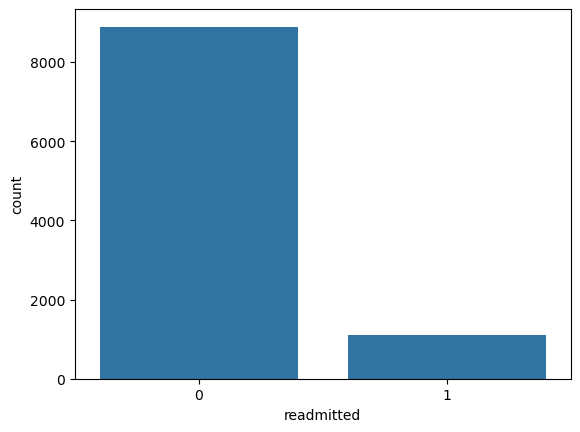

In [50]:
# Distribution of Readmission 
import seaborn as sns
sns.countplot(x='readmitted', data=df.sample(10000))  

#### Time in Hospital and Readmission


Text(0.5, 1.0, 'Time in Hospital VS. Readmission')

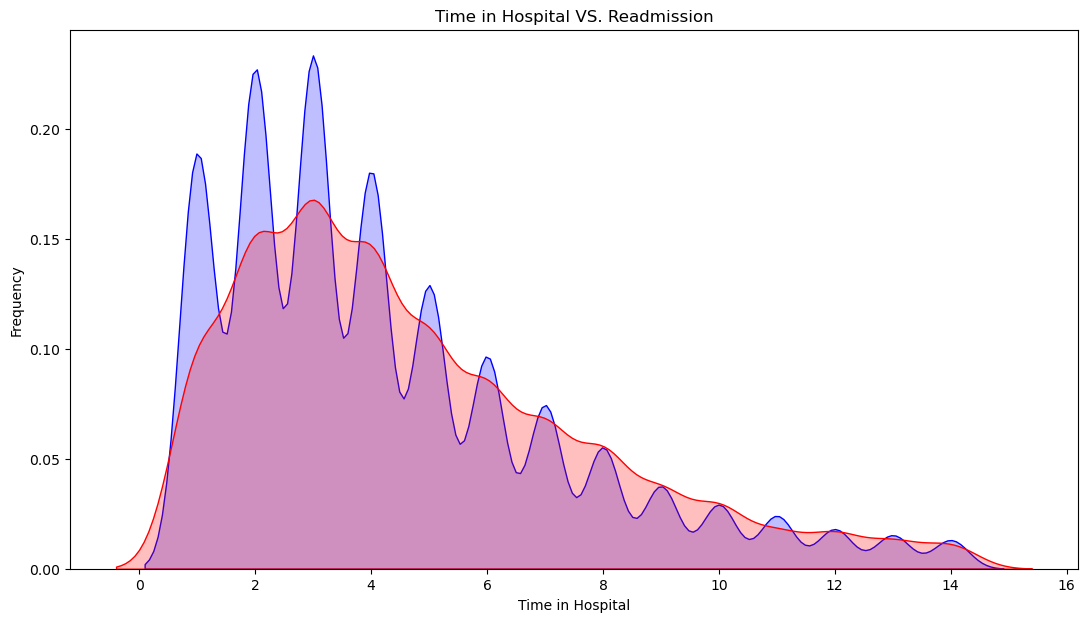

In [51]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(13,7),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'time_in_hospital'] , color='b',shade=True,label='Not Readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'time_in_hospital'] , color='r',shade=True, label='Readmitted')
ax.set(xlabel='Time in Hospital', ylabel='Frequency')
plt.title('Time in Hospital VS. Readmission')

#### Age and Readmission

Text(0.5, 1.0, 'Age of Patient VS. Readmission')

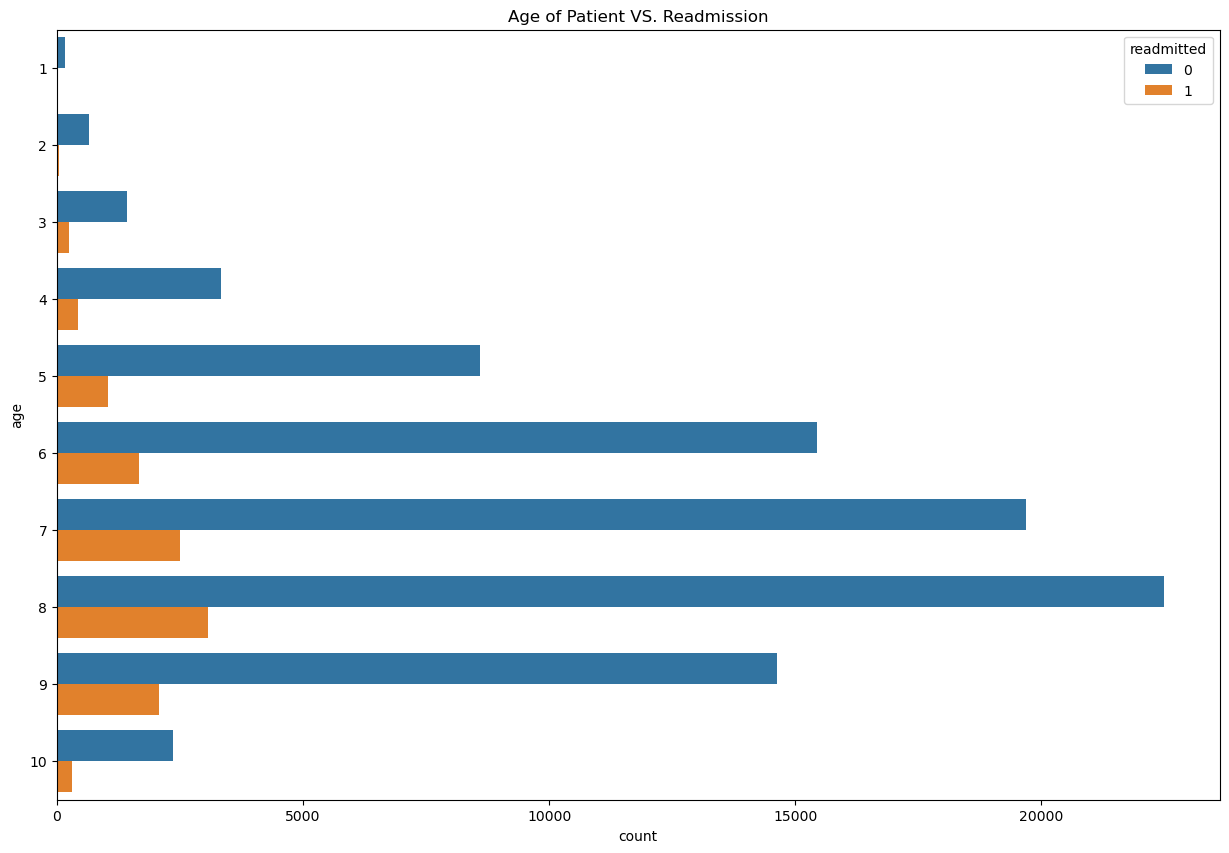

In [52]:
fig = plt.figure(figsize=(15,10))
sns.countplot(y= df['age'], hue = df['readmitted']).set_title('Age of Patient VS. Readmission')

#### Number of medication used and Readmission

Text(0.5, 1.0, 'Number of medication used VS. Readmission')

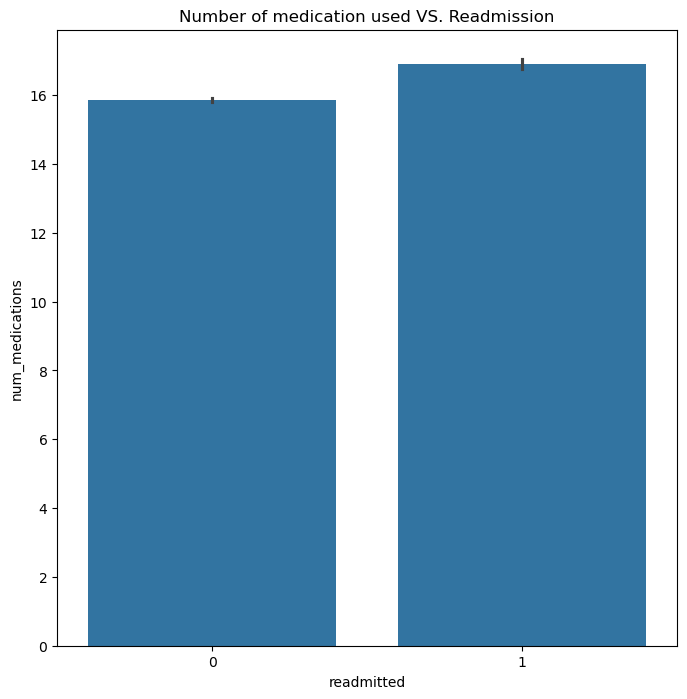

In [53]:
fig = plt.figure(figsize=(8,8))
sns.barplot(x = df['readmitted'], y = df['num_medications']).set_title("Number of medication used VS. Readmission")

#### Gender and Readmission
* Male = 1
* Female = 0

<Axes: xlabel='gender', ylabel='count'>

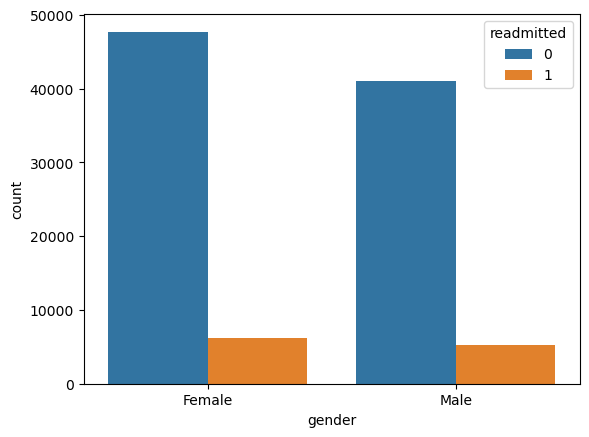

In [54]:
sns.countplot(x='gender', hue='readmitted', data=df)

#### Change of Medication and Readmission
* Change = 1
* No Change = 0

Text(0.5, 1.0, 'Change of Medication vs. Readmission')

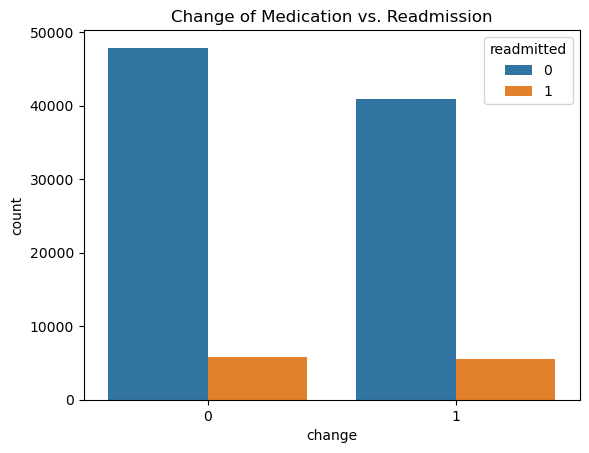

In [55]:
sns.countplot(x='change', hue='readmitted', data=df).set_title('Change of Medication vs. Readmission')

#### Diabetes Medication prescribed and Readmission
* Diabetes Medication - medications Nominal Indicates if there was any diabetic medication prescribed.
* Values: “yes” : 1 “no” : 0

Text(0.5, 1.0, 'Diabetes Medication Prescribed vs Readmission')

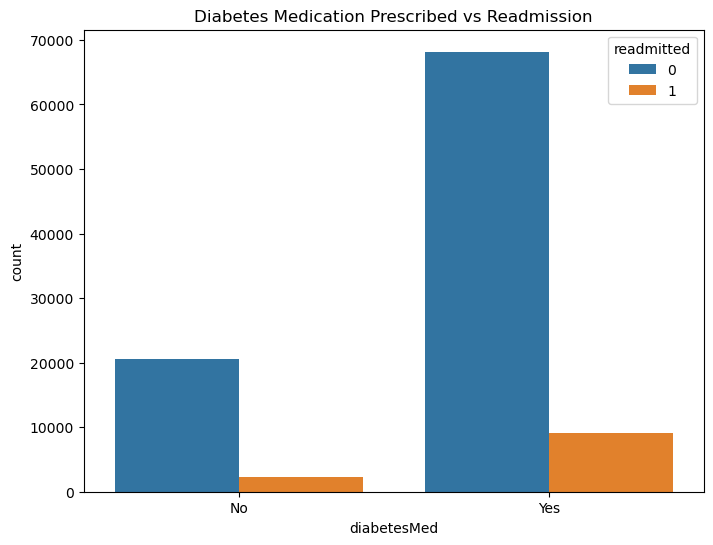

In [56]:
fig = plt.figure(figsize=(8, 6))
sns.countplot(x='diabetesMed', hue='readmitted', data=df).set_title('Diabetes Medication Prescribed vs Readmission')

#### Service Utilization and Readmission


['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id', 'time_in_hospital', 'medical_specialty', 'num_lab_procedures', 'num_procedures', 'num_medications', 'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1', 'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone', 'tolazamide', 'insulin', 'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 'metformin-rosiglitazone', 'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted']


Text(0.5, 1.0, 'Service Utilization VS. Readmission')

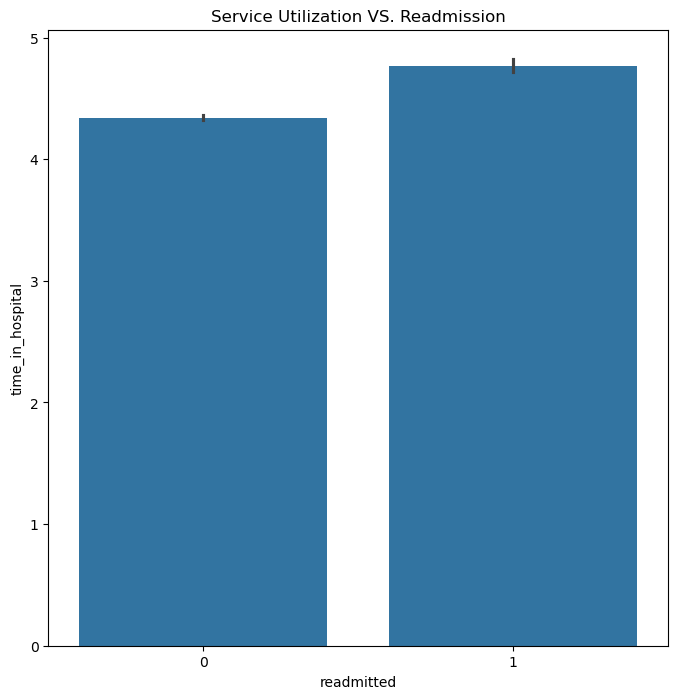

In [57]:
print(df.columns.tolist())
fig = plt.figure(figsize=(8,8))
sns.barplot( y = df['time_in_hospital'], x = df['readmitted']).set_title('Service Utilization VS. Readmission')

#### Number of lab procedure and Readmission

Text(0.5, 1.0, 'Number of lab procedure VS. Readmission')

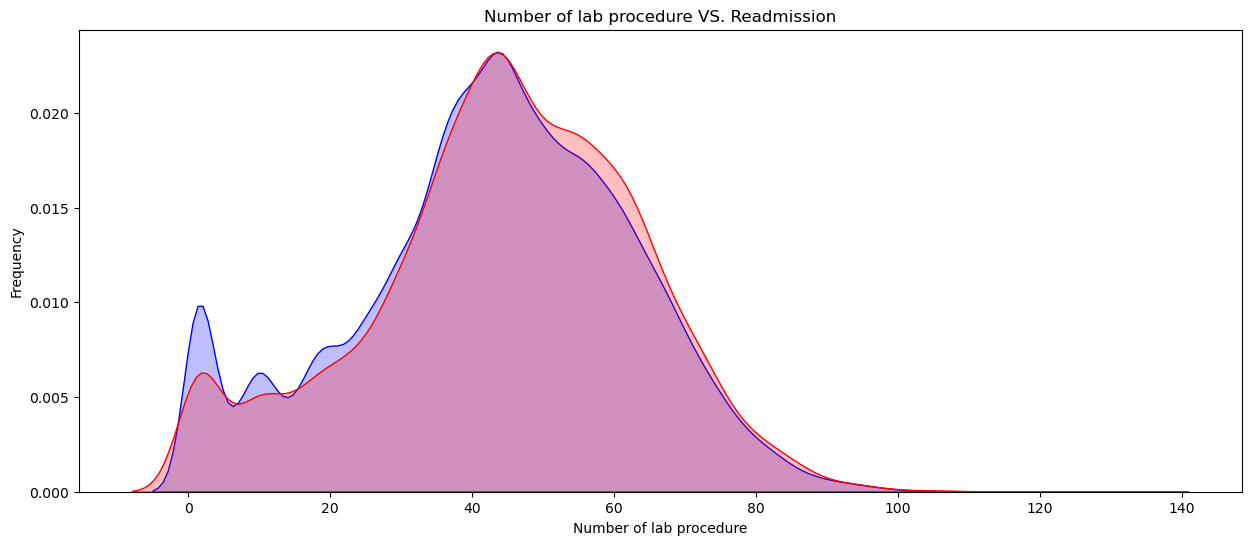

In [58]:
fig = plt.figure(figsize=(15,6),)
ax=sns.kdeplot(df.loc[(df['readmitted'] == 0),'num_lab_procedures'] , color='b',shade=True,label='Not readmitted')
ax=sns.kdeplot(df.loc[(df['readmitted'] == 1),'num_lab_procedures'] , color='r',shade=True, label='readmitted')
ax.set(xlabel='Number of lab procedure', ylabel='Frequency')
plt.title('Number of lab procedure VS. Readmission')

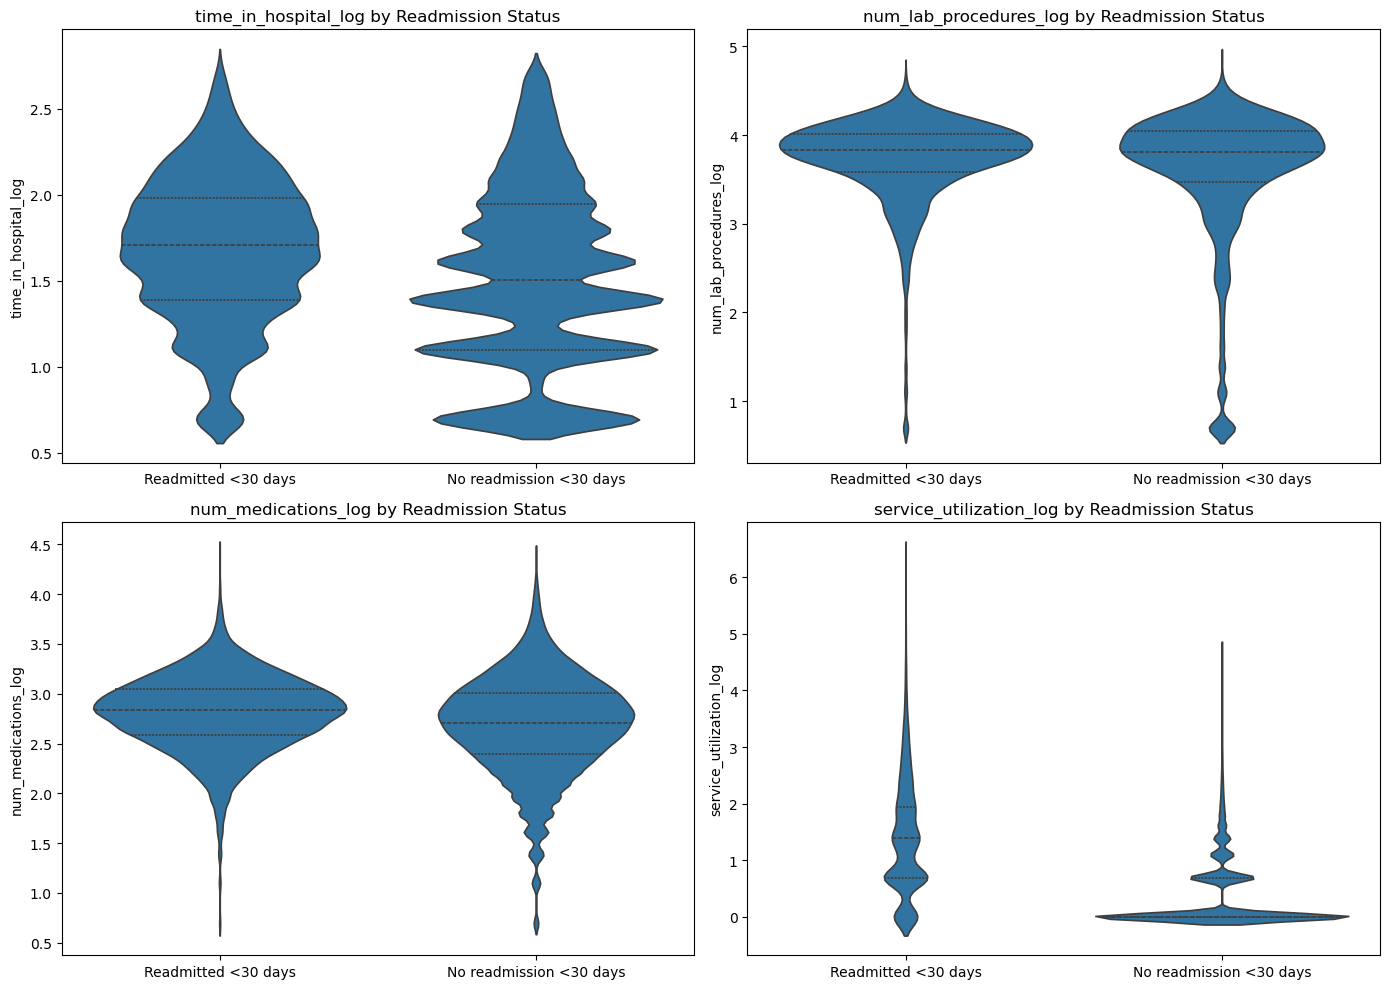

In [59]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# Make a copy just for visualization
viz_df = df_agg.copy()
viz_df['readmitted_label'] = viz_df['readmitted'].map(
    {0: 'No readmission <30 days', 1: 'Readmitted <30 days'}
)

# Choose a few key numeric features for violin plots
violin_features = [
    'time_in_hospital_log',
    'num_lab_procedures_log',
    'num_medications_log',
    'service_utilization_log'
]

plt.figure(figsize=(14, 10))

for i, col in enumerate(violin_features, 1):
    plt.subplot(2, 2, i)
    sns.violinplot(
        data=viz_df,
        x='readmitted_label',
        y=col,
        inner='quartile'
    )
    plt.title(f'{col} by Readmission Status')
    plt.xlabel('')
    plt.ylabel(col)

plt.tight_layout()
plt.show()


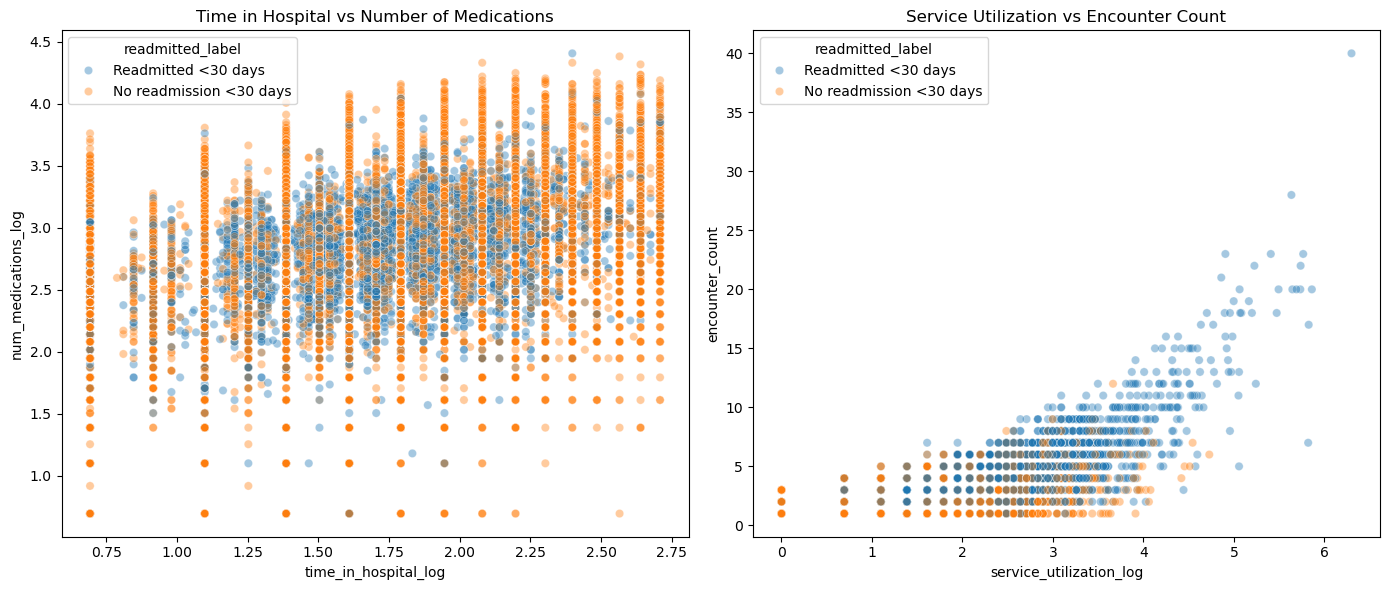

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

viz_df = df_agg.copy()
viz_df['readmitted_label'] = viz_df['readmitted'].map(
    {0: 'No readmission <30 days', 1: 'Readmitted <30 days'}
)

plt.figure(figsize=(14, 6))

# Scatter 1: Medications vs Length of Stay
plt.subplot(1, 2, 1)
sns.scatterplot(
    data=viz_df,
    x='time_in_hospital_log',
    y='num_medications_log',
    hue='readmitted_label',
    alpha=0.4
)
plt.title('Time in Hospital vs Number of Medications')
plt.xlabel('time_in_hospital_log')
plt.ylabel('num_medications_log')

# Scatter 2: Service utilization vs Encounter count
plt.subplot(1, 2, 2)
sns.scatterplot(
    data=viz_df,
    x='service_utilization_log',
    y='encounter_count',
    hue='readmitted_label',
    alpha=0.4
)
plt.title('Service Utilization vs Encounter Count')
plt.xlabel('service_utilization_log')
plt.ylabel('encounter_count')

plt.tight_layout()
plt.show()


In [ ]:
# Run this once if SHAP is not installed
%ip install shap


In [62]:
import pandas as pd

# X already has the selected 30 features after RFE
feature_names = X.columns

X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=feature_names)

X_train_scaled_df.head()


age  time_in_hospital_log  num_lab_procedures_log  num_procedures  \
0 -0.034147              2.093736                0.215296       -0.844837   
1 -1.910905              1.296341                0.766502       -0.844837   
2  0.591439             -0.864209                0.460252       -0.844837   
3  1.842611              1.064707                0.100174       -0.240771   
4 -0.034147             -0.066814                0.364621       -0.240771   

   num_medications_log  number_outpatient  number_emergency  \
0             0.315244           0.605800          2.076077   
1             0.129212          -0.218024         -0.102632   
2            -1.309737          -0.218024         -0.102632   
3             0.693737          -0.218024         -0.102632   
4             0.255067          -0.218024         -0.102632   

   number_inpatient_log  number_diagnoses  service_utilization_log  ...  \
0              0.621384         -0.403039                 2.339396  ...   
1             -0.533696         -2.222524                -0.667310  ...   
2             -0.533696         -1.182818                -0.667310  ...   
3              0.621384         -0.662965                 0.237799  ...   
4              0.621384          0.636667                 0.237799  ...   

   diag_2_group_Diabetes  diag_2_group_Other  diag_3_group_Diabetes  \
0               2.499621           -1.913227              -0.465598   
1              -0.400061            0.522677              -0.465598   
2              -0.400061           -1.913227              -0.465598   
3              -0.400061            0.522677              -0.465598   
4              -0.400061            0.522677              -0.465598   

   diag_3_group_Other  metformin  glipizide  glyburide   insulin    gender  \
0            0.565697  -0.553394  -0.406396  -0.370407  0.902095 -0.936231   
1           -1.767731  -0.553394  -0.406396  -0.370407  0.902095 -0.936231   
2            0.565697  -0.553394  -0.406396  -0.370407 -1.108531 -0.936231   
3            0.565697  -0.553394  -0.406396  -0.370407 -1.108531  1.068113   
4            0.565697  -0.553394  -0.406396  -0.370407  0.902095 -0.936231   

     change  
0  1.410983  
1  0.357810  
2 -0.695362  
3 -0.695362  
4  1.410983  

[5 rows x 30 columns]

Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/150 [00:00<?, ?it/s]

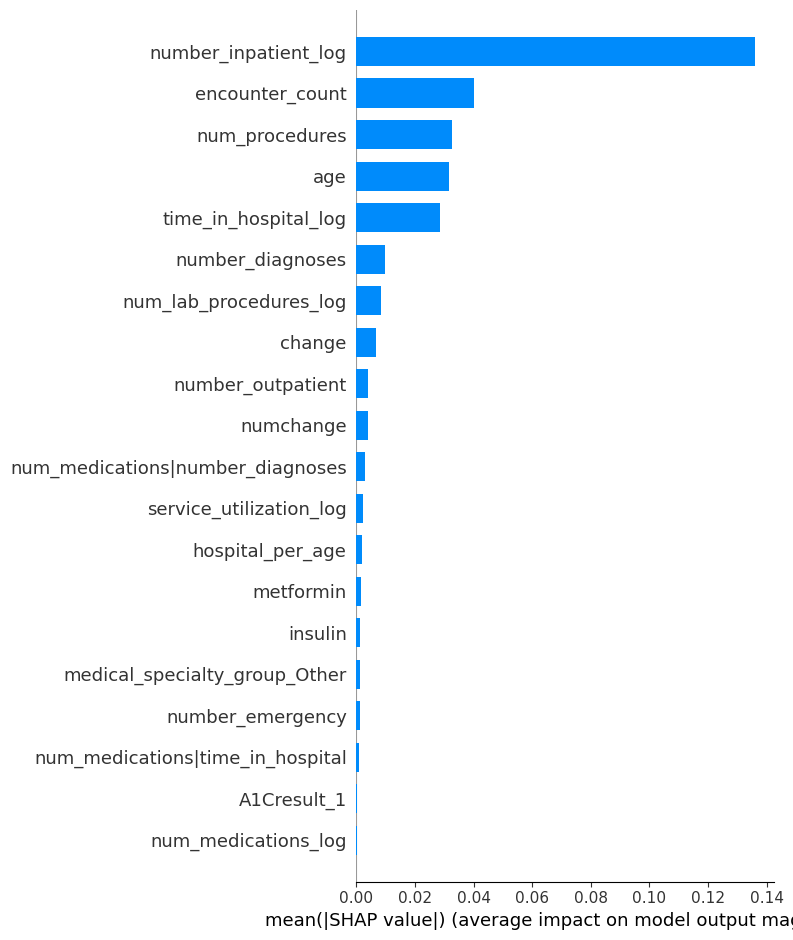

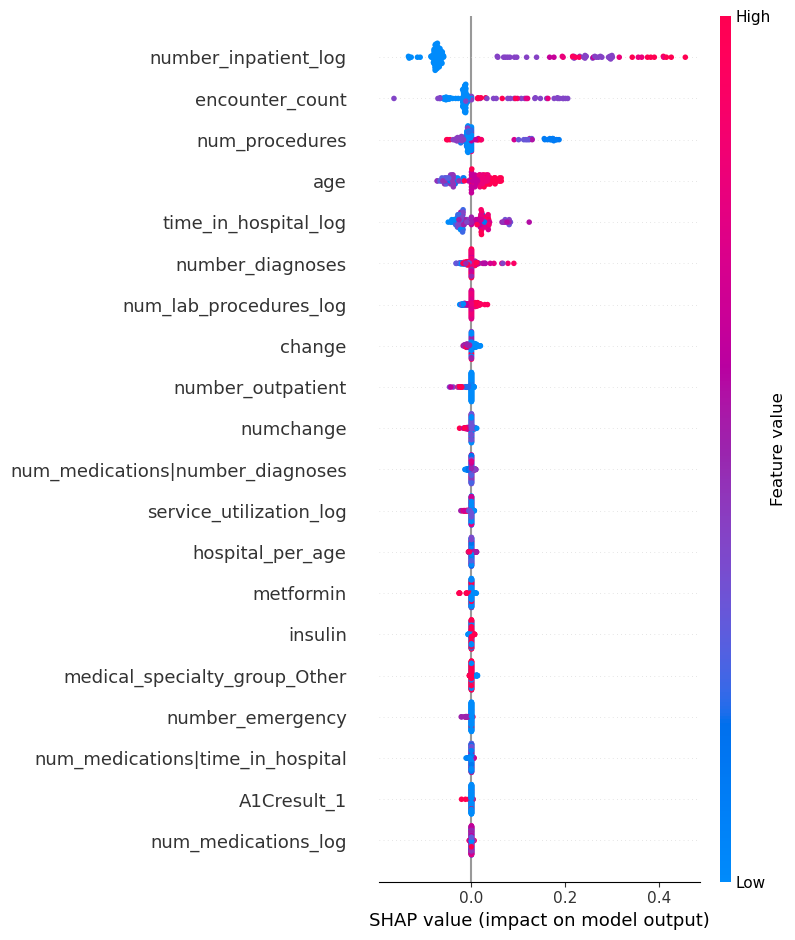

In [63]:
import shap
shap.initjs()

# Use a small background set for speed
background = X_train_scaled_df.sample(
    n=min(200, len(X_train_scaled_df)),
    random_state=0
)

# Model function: returns probability of readmission (class 1)
f = lambda data: final_xgb_model.predict_proba(data)[:, 1]

# KernelExplainer works with *any* model
explainer = shap.KernelExplainer(f, background)

# Sample some test points to explain
X_test_sample = X_test_scaled_df.sample(
    n=min(150, len(X_test_scaled_df)),
    random_state=0
)

# This may take a bit but is fine on a subset
shap_values = explainer.shap_values(X_test_sample)

# 1) Global feature importance (bar)
shap.summary_plot(
    shap_values,
    X_test_sample,
    plot_type="bar",
    show=True
)

# 2) Beeswarm plot – direction + magnitude
shap.summary_plot(
    shap_values,
    X_test_sample,
    show=True
)


In [64]:
import shap
shap.initjs()

feature_names = X.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled_df  = pd.DataFrame(X_test_scaled,  columns=feature_names)

background = X_train_scaled_df.sample(
    n=min(200, len(X_train_scaled_df)),
    random_state=0
)

f = lambda data: final_xgb_model.predict_proba(data)[:, 1]

explainer = shap.KernelExplainer(f, background)

X_test_sample = X_test_scaled_df.sample(
    n=min(150, len(X_test_scaled_df)),
    random_state=0
)

shap_values = explainer.shap_values(X_test_sample)


Using 200 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.


  0%|          | 0/150 [00:00<?, ?it/s]

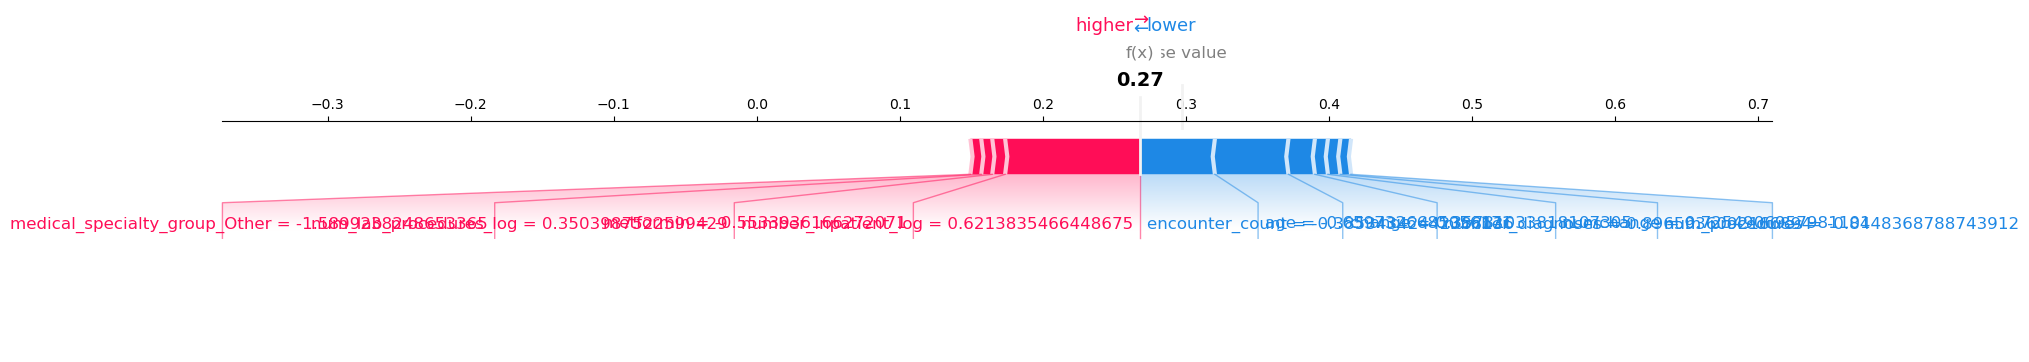

In [65]:
import numpy as np

expected_value = explainer.expected_value         # base value
shap_values_array = np.array(shap_values)         # (n_samples, n_features)

# Pick one patient from the sample (you can change idx)
idx = 9

shap.force_plot(
    expected_value,
    shap_values_array[idx],
    X_test_sample.iloc[idx],
    matplotlib=True
)
